### 1. Import Data from Web Crawling

In [1]:
!jupyter trust DataAnalysis.ipynb

Notebook already signed: DataAnalysis.ipynb


In [2]:
import pandas as pd
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
from pyecharts import *
from pyecharts import options as opts
from pyecharts.globals import ThemeType
from pyecharts.render import make_snapshot
from pyecharts.globals import CurrentConfig, NotebookType
from snapshot_pyppeteer import snapshot
import nest_asyncio
from collections import Counter
import jieba
from pyecharts.globals import SymbolType

In [3]:
InteractiveShell.ast_node_interactivity = "all"
nest_asyncio.apply()
CurrentConfig.NOTEBOOK_TYPE = NotebookType.JUPYTER_LAB
ThemeType.WALDEN
new_csv_path = "Updated-CSV"

## HKTVMall Price

In [4]:
# HKTVMall
data_hktv = pd.read_csv('Products_HKTVMall.csv')

data_hktv = data_hktv[
    (~data_hktv.product_brand.str.contains("快譯通|JBL", regex=True))
]

In [5]:
# Tablets
tablets_hktv = data_hktv[
    (data_hktv.product_type == 'tablet') & 
    (data_hktv.product_price > 800) & 
    (~data_hktv.product_name.str.contains(
        "智能手機|智能筆|多功能底座|陳列品|基座", 
        regex=True)
    )
]
#remove accesories

mean_tablets_hktv = tablets_hktv.product_price.mean()
median_tablets_hktv = tablets_hktv.product_price.median()

In [6]:
# Laptop
laptops_hktv = data_hktv[
    (data_hktv.product_type == 'laptop') & 
    (data_hktv.product_price > 800) & 
    (~data_hktv.product_name.str.contains(
        "智能筆|陳列品|桌上電腦|背包", 
        regex=True)
    )
]

#remove accesories
mean_laptops_hktv = laptops_hktv.product_price.mean()
median_laptops_hktv = laptops_hktv.product_price.median()

In [7]:
# Smartphones
phones_hktv = data_hktv[
    (data_hktv.product_type == 'smartphone') & 
    (data_hktv.product_price > 298) & 
    (~data_hktv.product_name.str.contains(
        '更換|AirPods|保護貼|空氣淨化器|數據採集機|打印機|音樂盒|陳列品|機械鍵盤|手機支架|耳機|動圈', 
        regex=True)
    )
]
#remove accesories

mean_phones_hktv = phones_hktv.product_price.mean()
median_phones_hktv = phones_hktv.product_price.median()

In [8]:
def concat_to_new_df(df1, df2, df3, file_name):
    list_frame = [df1, df2, df3]
    all_products_df = pd.concat(list_frame)
    all_products_df.index.name = "Index"
    all_products_df = all_products_df.astype({"product_index": str})
    all_products_df = all_products_df.drop(all_products_df.columns[0], axis=1)
    print(all_products_df.shape)
    all_products_df.to_csv(file_name, encoding="utf_8_sig")
    return all_products_df

In [9]:
filtered_hktv = concat_to_new_df(tablets_hktv, laptops_hktv, phones_hktv, f"{new_csv_path}/Filtered-HKTVMall-Products.csv")

(1003, 9)


In [10]:
hktv_total_comment = filtered_hktv.no_of_rates.sum()

In [11]:
hktv_total_comment

187

## Suning Price

In [12]:
# Suning
data_suning = pd.read_csv('Products_Suning.csv')

data_suning = data_suning[(data_suning.price > 800)]

In [13]:
# Tablets
tablets_suning = data_suning[
    (data_suning.product_type == 'Tablet') & 
    (data_suning.price > 800) & 
    (~data_suning.product_name.str.contains('智能手機|智能筆|多功能底座', regex=True))
]
#remove accesories

mean_tablets_suning = tablets_suning.price.mean()
median_tablets_suning = tablets_suning.price.median()

In [15]:
# Laptop
laptops_suning = data_suning[
    (data_suning.product_type == 'Laptop') & 
    (data_suning.price > 800) & 
    (~data_suning.product_name.str.contains('智能筆', regex=True))
]
#remove accesories

mean_laptops_suning = laptops_suning.price.mean()
median_laptops_suning = laptops_suning.price.median()

In [14]:
# Smartphones
phones_suning = data_suning[
    (data_suning.product_type == 'Mobile Phone') & 
    (data_suning.price > 298) & 
    (~data_suning.product_name.str.contains('更換|AirPods', regex=True))
]
#remove accesories

mean_phones_suning = phones_suning.price.mean()
median_phones_suning = phones_suning.price.median()

In [16]:
filtered_suning = concat_to_new_df(tablets_suning, laptops_suning, phones_suning, f"{new_csv_path}/Filtered-Suning-Products.csv")

(336, 9)


In [17]:
suning_total_comment = filtered_suning.total_comment.sum()
suning_total_comment

48069

## Plot total number of two shop

In [18]:
def plot_total_comments(a_list: list):
    total_comment_bar = (
        charts.Bar(init_opts=opts.InitOpts(theme=ThemeType.WALDEN))
        .add_xaxis(["HKTVMall", "Suning"])
        .add_yaxis("Comments Count", [187, 48226])
        .set_global_opts(
            title_opts=opts.TitleOpts(
                title=f"Total comments of two platforms", 
            )
        )
    )
    
    file_name = "total-comments"
    
    make_snapshot(
        snapshot, 
        total_comment_bar.render(f"Pictures/{file_name}.html"), 
        f"Pictures/{file_name}.png"
    )
    return total_comment_bar


total_comments_count = [hktv_total_comment, suning_total_comment]
total_comments_bar = plot_total_comments(total_comments_count)

total_comments_bar.load_javascript()
total_comments_bar.render_notebook()

### Useful comments

In [19]:
suning_comment_df = pd.read_csv('Customers_Suning.csv')
suning_meaningful_comments = len(suning_comment_df[(~suning_comment_df.buyer_comment.str.contains('没有填写评价', regex=True))])
suning_meaningful_comments

233

In [22]:
def plot_meaningful_comments(a_list: list):
    meaningful_comment_bar = (
        charts.Bar(init_opts=opts.InitOpts(theme=ThemeType.SHINE))
        .add_xaxis(["HKTVMall", "Suning"])
        .add_yaxis("Meaningful Comments Count", [187, 233])
        .set_global_opts(
            title_opts=opts.TitleOpts(
                title=f"Meaningful comments", 
            )
        )
    )
    
    file_name = "meaningful-comments"
    
    make_snapshot(
        snapshot, 
        meaningful_comment_bar.render(f"Pictures/{file_name}.html"), 
        f"Pictures/{file_name}.png"
    )
    return meaningful_comment_bar


meaningful_comments_count = [hktv_total_comment, suning_total_comment]
meaningful_comments_bar = plot_meaningful_comments(meaningful_comments_count)

meaningful_comments_bar.load_javascript()
meaningful_comments_bar.render_notebook()

## Price stats of two platforms

### Plot function

In [28]:
def plot_box(x_labels: list, y1_data: list, y2_data: list, group_name1: str, group_name2: str) -> charts.Boxplot:
    box_plot = charts.Boxplot(init_opts=opts.InitOpts(theme=ThemeType.WALDEN))

    box_plot = (
        box_plot.add_xaxis(xaxis_data=x_labels)
        .add_yaxis(series_name=group_name1, y_axis=box_plot.prepare_data(y1_data))
        .add_yaxis(series_name=group_name2, y_axis=box_plot.prepare_data(y2_data))
        .set_global_opts(
            title_opts=opts.TitleOpts(
                title=f"{group_name1} and {group_name2}price box plot"
            ),
            tooltip_opts=opts.TooltipOpts(
                trigger="item", axis_pointer_type="shadow"
            ),
            xaxis_opts=opts.AxisOpts(
                type_="category",
                boundary_gap=True,
                splitarea_opts=opts.SplitAreaOpts(is_show=False),
                axislabel_opts=opts.LabelOpts(formatter="{value}"),
                splitline_opts=opts.SplitLineOpts(is_show=True),
            ),
            yaxis_opts=opts.AxisOpts(
                type_="value",
                name="Price",
                splitarea_opts=opts.SplitAreaOpts(
                    is_show=True, areastyle_opts=opts.AreaStyleOpts(opacity=1)
                ),
            ),
        )
        .set_series_opts(tooltip_opts=opts.TooltipOpts(formatter=None))
    )
    
    make_snapshot(
        snapshot, 
        box_plot.render(f"Pictures/price-box-plot.html"), 
        f"Pictures/price-box-plot.png"
    )

    return box_plot

In [24]:
x_label_price = ["tablet", "laptop", "phones"]

### Suning price data

In [25]:
suning_prices = []
suning_prices.append(tablets_suning.price.to_list())
suning_prices.append(laptops_suning.price.to_list())
suning_prices.append(phones_suning.price.to_list())

### HKTVMall price data

In [26]:
hktv_prices = []
hktv_prices.append(tablets_hktv.product_price.to_list())
hktv_prices.append(laptops_hktv.product_price.to_list())
hktv_prices.append(phones_hktv.product_price.to_list())

In [29]:
price_box = plot_box(x_label_price, suning_prices, hktv_prices, "Suning", "HKTVMall")
price_box.load_javascript()
price_box.render_notebook()

### Plot Category Count

In [43]:
def compare_bar_plot(suning_list: list, hktv_list: list, file_name: str) -> charts.Bar:
    subject = "Product Count"
    title = file_name.replace("-", " ").title()
    each_category_bar = (
        charts.Bar(init_opts=opts.InitOpts(theme=ThemeType.WALDEN))
        .add_xaxis(x_label_price)
        .add_yaxis(f"Suning {subject}", suning_list)
        .add_yaxis(f"HKTVMall {subject}", hktv_list)
        .set_global_opts(
            title_opts=opts.TitleOpts(
                title=title, 
            )
        )
    )
    
    make_snapshot(
        snapshot, 
        each_category_bar.render(f"Pictures/{file_name}.html"), 
        f"Pictures/{file_name}.png"
    )
    return each_category_bar


In [44]:

all_suning_prod_count = [len(tablets_suning), len(laptops_suning), len(phones_suning)]
all_hktv_prod_count = [len(tablets_hktv), len(laptops_hktv), len(phones_hktv)]

each_category_bar = compare_bar_plot(all_suning_prod_count, all_hktv_prod_count, file_name="compare-product-count")
each_category_bar.load_javascript()
each_category_bar.render_notebook()

### Plot Stats Data

In [43]:
def plot_stats_data(stats_df, stats_owner: str) -> charts.Bar:
    product_names = stats_suning["product_name"].to_list()
    median = stats_suning["median_rates"].to_list()
    mean = stats_suning["mean_rates"].to_list()
    
    bar = (
        charts.Bar(init_opts=opts.InitOpts(theme=ThemeType.WALDEN))
        .add_xaxis(product_names)
        .add_yaxis("Median Rates", median)
        .add_yaxis("Mean Rates", mean)
    )
    
    make_snapshot(
        snapshot, 
        bar.render(), 
        f"Pictures/{stats_owner}-stats.png"
    )
    return bar

In [121]:
data_cust_suning = pd.read_csv('Customers_Suning.csv')
data_prod_suning = pd.read_csv(f'{new_csv_path}/Filtered-Suning-Products.csv')
data_prod_suning = data_prod_suning.drop(data_prod_suning.columns[0], axis=1)
data_cust_hktv = pd.read_csv('Customers_HKTVMall.csv')
data_prod_hktv = pd.read_csv(f'{new_csv_path}/Filtered-HKTVMall-Products.csv')
data_prod_hktv = data_prod_hktv.drop(data_prod_hktv.columns[0], axis=1)

## Suning Volume of Transaction

In [122]:
filtered = data_prod_suning.sort_values(['total_comment'], ascending=False)
filtered = filtered[filtered.total_comment > 0]
prod_index = filtered.product_index
# filtered[filtered.total_comment > 0].count()

In [123]:
customer_comments_records_suning = data_cust_suning['product_index'].value_counts()
# print(customer_comments_records_suning.head(15))

#Get all commented product from customer data

#get avg rates from customers
stats_suning_dict = {}
for i in customer_comments_records_suning.index:
    stats_suning_dict[i] = [
        data_cust_suning[data_cust_suning.product_index == i].user_rate.median(), 
        data_cust_suning[data_cust_suning.product_index == i].user_rate.mean()
    ]

stats_suning = pd.DataFrame(stats_suning_dict).T
stats_suning.columns = ['median_rates', 'mean_rates']
stats_suning = stats_suning.round({"median_rates": 2, "mean_rates": 2})

# stats["no_of_rates"] = np.nan
stats_suning.index.name = "Product Index"
# temp = prod_data[['product_index', 'no_of_rates']].set_index('product_index')


In [124]:
all_stats_data_suning = pd.merge(
    stats_suning, data_prod_suning,
    left_on = "Product Index",
    right_on = "product_index",
    how='outer'
)
all_stats_data_suning.to_csv(f"{new_csv_path}/all_info_data_suning.csv", encoding="utf_8_sig", index=False)

In [125]:
stats_suning = all_stats_data_suning[["product_name", "product_index", "product_type", "median_rates", "mean_rates", "total_comment"]]
stats_suning = stats_suning.fillna(0)
stats_suning = stats_suning.astype({"product_index": str})

In [126]:
stats_suning.to_csv(f"{new_csv_path}/Stats_Suning.csv", encoding="utf_8_sig")
stats_suning

,product_name,product_index,product_type,median_rates,mean_rates,total_comment
0,APPLE IPHONE XS 64GB 手機 金色,10584849206.0,Mobile Phone,5.0,5.0,472.0
1,HUAWEI MATE 20 X 手機 藍色,10674060101.0,Mobile Phone,5.0,5.0,505.0
2,APPLE IPHONE XR 128GB 手機 黑色,10584849457.0,Mobile Phone,5.0,5.0,510.0
3,APPLE IPHONE XS MAX 256GB 手機 金色,10584849382.0,Mobile Phone,5.0,5.0,509.0
4,Apple iPad Pro 11 256GB Wi-Fi Space Gray MTXQ2...,10555802003.0,Tablet,5.0,5.0,508.0
...,...,...,...,...,...,...
334,APPLE IPHONE 11 64GB 手機 白色,11356500069.0,Mobile Phone,0.0,0.0,0.0
335,APPLE IPHONE 11 64GB 手機 綠色,11356505266.0,Mobile Phone,0.0,0.0,0.0
336,HUAWEI P30 PRO 8+256GB 手機 薰衣草,11362693468.0,Mobile Phone,0.0,0.0,0.0
337,APPLE IPHONE 11 PRO 64GB 手機 太空灰,11356505293.0,Mobile Phone,0.0,0.0,0.0


## HKTVMall Volume of Transaction

In [119]:
customer_comments_records_hktv = data_cust_hktv['product_index'].value_counts()
# print(customer_comments_records_hktv.head(15))

#Get all commented product from customer data

#get avg rates from customers
stats_hktv_dict = {}
for i in customer_comments_records_hktv.index:
    stats_hktv_dict[i] = [
        data_cust_hktv[data_cust_hktv.product_index == i].user_rate.median(), 
        data_cust_hktv[data_cust_hktv.product_index == i].user_rate.mean()
    ]

stats_hktv = pd.DataFrame(stats_hktv_dict).T
stats_hktv.columns = ['median_rates', 'mean_rates']
stats_hktv = stats_hktv.round({"median_rates": 2, "mean_rates": 2})

# stats["no_of_rates"] = np.nan
stats_hktv.index.name = "Product Index"
# temp = prod_data[['product_index', 'no_of_rates']].set_index('product_index')

In [120]:
all_stats_data_hktv = pd.merge(
    stats_hktv, data_prod_hktv,
    left_on = "Product Index",
    right_on = "product_index",
    how='outer'
)

all_stats_data_hktv = all_stats_data_hktv.fillna(0)
all_stats_data_hktv = all_stats_data_hktv.drop(
    all_stats_data_hktv[all_stats_data_hktv["product_name"] == 0].index
)

all_stats_data_hktv.to_csv(f"{new_csv_path}/all_info_data_hktv.csv", encoding="utf_8_sig", index=False)

In [117]:
stats_hktv = all_stats_data_hktv[["product_name", "product_index", "product_type", "median_rates", "mean_rates", "no_of_rates"]]

In [118]:
stats_hktv.to_csv(f"{new_csv_path}/Stats_HKTVMall.csv", encoding="utf_8_sig")
stats_hktv

,product_name,product_index,product_type,median_rates,mean_rates,no_of_rates
0,5.5吋 4G-LTE 智能電話 (4+64GB) X598 (黑色),H0972006_S_196,smartphone,1.5,2.70,10.0
1,超薄 notebook - F7 (6+128GB),H0972006_S_F7,tablet,3.5,3.10,17.0
2,4G-LTE 智能手機 - GALAXY S4 (黑色),H0972006_S_325,smartphone,2.5,2.90,17.0
5,"iPhone SE - 64GB, 二手9成新 (100%正常運作)(平行進口)",H6725001_S_iSE_G_64_3A_U,smartphone,5.0,4.57,7.0
7,"(11.6"", N3060,4GB RAM,32GB eMMC) XE500C13-K01H...",H0762001_S_XE500C13-K03US-800160302,laptop,5.0,4.86,7.0
...,...,...,...,...,...,...
1045,香港行貨(魅影黑)GALAXY A80 A8050 8GB RAM 128GB ROM,H7007001_S_SAMA8050H01BK01,smartphone,0.0,0.00,0.0
1046,Moto G5s Plus XT1805 智能手機 (灰) - Motorola,H0775002_S_G5P01GRY,smartphone,0.0,0.00,0.0
1047,ONE PLUS 7 Pro 12+256GB-黑（平行進口）,H5912001_S_OP0011,smartphone,0.0,0.00,0.0
1048,"iPhone 7 128GB 黑色, 二手9成新 (100%正常運作)(平行進口)(供應商9...",H0972006_S_iphone7bk,smartphone,0.0,0.00,0.0


## Wordcloud

### HKTVMALL Wordcloud

In [167]:
# Convert to text file
hktv_comments_series = data_cust_hktv["buyer_comment"]
hktv_comments_df = pd.DataFrame(hktv_comments_series)
hktv_comments_df.index.name = "Index"
hktv_comments_df.to_csv("tmp_wordcloud.txt", header=None, index=None, sep=';', encoding="utf_8")

In [177]:
def regex_change(line):
    #前缀的正则
    username_regex = re.compile(r"^\d+::")
    #URL，为了防止对中文的过滤，所以使用[a-zA-Z0-9]而不是\w
    url_regex = re.compile(r"""
        (https?://)?
        ([a-zA-Z0-9]+)
        (\.[a-zA-Z0-9]+)
        (\.[a-zA-Z0-9]+)*
        (/[a-zA-Z0-9]+)*
    """, re.VERBOSE|re.IGNORECASE)
    #剔除日期
    data_regex = re.compile(u"""        #utf-8编码
        年 |
        月 |
        日 |
        (周一) |
        (周二) | 
        (周三) | 
        (周四) | 
        (周五) | 
        (周六)
    """, re.VERBOSE)
    #剔除所有数字
    decimal_regex = re.compile(r"[^a-zA-Z]\d+")
    #剔除空格
    space_regex = re.compile(r"\s+")

    line = username_regex.sub(r"", line)
    line = url_regex.sub(r"", line)
    line = data_regex.sub(r"", line)
    line = decimal_regex.sub(r"", line)
    line = space_regex.sub(r"", line)

    return line

In [195]:
f = open("tmp_wordcloud.txt", encoding='utf-8').read()
new_f = regex_change(f)
words = list(jieba.cut(new_f, cut_all=True))
data = dict(Counter(words))

In [191]:
data.pop('，')
data.pop('.')
data.pop("'")
data.pop("。")
data.pop("！")
data.pop("!")
data.pop(",")
data.pop("?")

254

60

7

78

36

27

82

7

In [196]:
all_words = []
for k, v in data.items():
    all_words.append((k, v))

In [199]:
c = (
        charts.WordCloud()
        .add("", all_words, word_size_range=[20, 200], shape=SymbolType.DIAMOND)
        .set_global_opts(title_opts=opts.TitleOpts(title="WordCloud-HKTVMall"))
    )
c.load_javascript()

In [200]:
c.render_notebook()

['手機裏預載兩個有問題的apps. 其中一個是file manager。若果停用此App, 螢光幕會不斷彈出停用通知。若果啟用此apps, 一開機手機會提示此apps 有極大安全風險。 差，電池很易熱滾燙，兼且電力消耗快。 good 言過其實，正常使用下午四時電量只剩20%左右。到维修部請教操作問題，師傅有空也不答你，叫你自已看說明書。一肚氣，無下次。 Excellent 我等28/11, 1399, VIP 95折再買= 1329點知買完之後第日, 之後掛左5,6日都係這個價1299 再減150 =1149, 買貴左180....價格十分跣人 幫朋友買,唔知好唔好 好快冇電，用一陣就好熱 手機装滿間蹀軟件，拖慢手機速度，俄羅斯版本，用起来十分不方便，千萬不要買! 抵用！好', '濾網沒有包裝袋，是兩腳插頭，其他幾好 No adaptor provided.  Late delivery half an hour. 準時發貨，包裝很好，連線容易，好靜說明書有多個語言，就係冇中文，插頭係兩圓腳，過濾器無包裝袋 Good 超值、抵用 從收到貨到現在連續長開4日，室內空氣質素好左，好靜冇雜音，可以用App監控系統方便~ 剛取貨，但打開背板即見慮芯，毋須拆袋，無插頭跟，無說明書，唔識怎連wifi. 準時送到，用左3分鐘，機著到冇壞 Work good as of now 運送快捷有禮', "輕巧，切備齊。 Very good product, on time delivery. I bought this phone three days ago.  I discovered that ths charger and adapter become very hot while I was charging the phone.  I wonder whether it would cause fire because my other Samsung phones does not have this phenomenon.  Winnie Chu Both two packages has been opened and resealed, I wonder whether they are brand new or not.I definitely won't buy

(-0.5, 399.5, 199.5, -0.5)

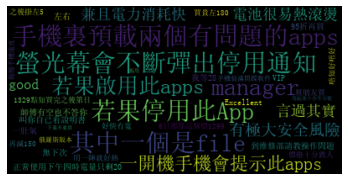

FileNotFoundError: [Errno 2] No such file or directory: 'hktvmall-commentop10-wordcloud/hktv-item0.png'

In [83]:
customer_comments_records_hktv = data_cust_hktv['product_index'].value_counts()
prod_index_hktv = customer_comments_records_hktv.head(10).index

#Get all commented product from customer data

#get avg rates from customers
stats_hktv_dict = {}
for i in customer_comments_records_hktv.index:
    stats_hktv_dict[i] = [
        data_cust_hktv[data_cust_hktv.product_index == i].user_rate.median(), 
        data_cust_hktv[data_cust_hktv.product_index == i].user_rate.mean()
    ]

stats_hktv = pd.DataFrame(stats_hktv_dict).T
stats_hktv.columns = ['median_rates', 'mean_rates']
stats_hktv = stats_hktv.round({"median_rates": 2, "mean_rates": 2})

all_groups_hktv = []
for i in prod_index_hktv:
    group = []
    temp = data_cust_hktv[data_cust_hktv.product_index == i]
    for j in temp.buyer_comment:
        group.append(j)
        str_group = ' '.join(group)
    all_groups_hktv.append(str_group)
print(all_groups_hktv)
    
# index_hktv = 0
# for text in all_groups_hktv:
#     wordcloud = WordCloud(font_path="simsun.ttf").generate(text)
#     plt.imshow(wordcloud, interpolation='bilinear')
#     plt.axis("off")
#     plt.show()
#     wordcloud.to_file(f"hktvmall-commentop10-wordcloud/hktv-item{index_hktv}.png")
#     index_hktv += 1

(-0.5, 399.5, 199.5, -0.5)

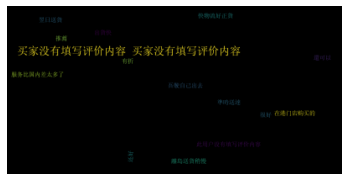

FileNotFoundError: [Errno 2] No such file or directory: 'suning-commentop10-wordcloud/hktv-item0.png'

In [85]:
customer_comments_records = data_prod_suning.sort_values(['total_comment'], ascending=False)
prod_index = customer_comments_records.head(10).product_index

#Get all commented product from customer data

#get avg rates from customers
# stats_dict = {}
# for i in customer_comments_records.index:
#     stats_dict[i] = [cust_data[cust_data.product_index == i].user_rate.median(), cust_data[cust_data.product_index == i].user_rate.mean()]

# stats = pd.DataFrame(stats_dict).T
# stats.columns = ['median_rates', 'mean_rates']


all_groups = []
for i in prod_index:
    group = []
    temp = data_cust_suning[data_cust_suning.product_index == i]
    for j in temp.buyer_comment:
        group.append(j)
    str_group = ' '.join(group)
    all_groups.append(str_group)
    
index = 0
for text in all_groups:
    wordcloud = WordCloud(font_path="simsun.ttf").generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    wordcloud.to_file(f"suning-commentop10-wordcloud/hktv-item{index}.png")
    index += 1

(-0.5, 399.5, 199.5, -0.5)

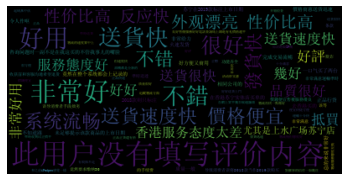

In [86]:
group = []
for i in data_cust_suning[~data_cust_suning.buyer_comment.str.contains('买家没有填写评价内容！', regex=True)].buyer_comment:
    group.append(i)
text = ' '.join(group)

wordcloud = WordCloud(font_path="simsun.ttf").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud.to_file("wordcloud-suning-overall.png")

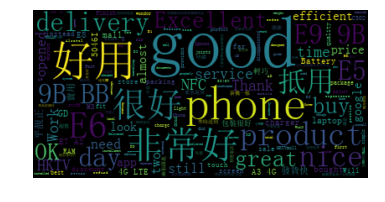

In [113]:
group = []
for i in data_cust_hktv.buyer_comment:
    group.append(i)
text = ' '.join(group)

wordcloud = WordCloud(font_path="simsun.ttf").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud.to_file("wordcloud-hktv-overall.png")

# Grouping Items by Name 

## Grouping Algorithm

- Cosine similarity

In [32]:
import textdistance
import re


regex_filter = '[\(\-\)（）\[\]—\/]|香港行貨|平行進口|水貨'

threshold = 0.8
def group_by_text_similarity(item_name = []):
    all_matches = []
    while len(item_name) > 0:
        match = []
        match.append(item_name[0])
        temp = re.sub(regex_filter, ' ', item_name[0])
        item_name.pop(0)
        i = 0
        while len (item_name) > 0:
            if i == len(item_name):
                break
            processed_str = re.sub(regex_filter, ' ', item_name[i])
            if textdistance.cosine(processed_str , temp) > threshold:
                match.append(item_name[i])
                item_name.pop(i)
            else:
                i+=1
        all_matches.append(match)
    return all_matches

#### Plot grouping finction

In [33]:
def plot_grouping_bar_chart(grouping_list: list, group_name: str) -> charts.Bar:
    bar = (
        charts.Bar(init_opts=opts.InitOpts(theme=ThemeType.WALDEN))
        .add_xaxis(x_label_price)
        .add_yaxis("Grouped Product Count", grouping_list)
        .set_global_opts(
            title_opts=opts.TitleOpts(
                title=f"Product Count of {group_name}", 
            )
        )
    )
    make_snapshot(
        snapshot, 
        bar.render(f"Pictures/{group_name}-grouping-count.html"), 
        f"Pictures/{group_name}-grouping-count.png"
    )
    return bar


In [34]:
def plot_grouping_pie_chart(grouping_list: list, group_name: str) -> charts.Pie:
   
    labels = x_label_price
    percentages = []
    sum = 0
    for i in grouping_list:
        sum += i
    for g in grouping_list:
        value = round(g / sum, 2)
        percentages.append(value)
        
    
    pie = (
        charts.Pie(init_opts=opts.InitOpts(theme=ThemeType.LIGHT))
        .add("", [list(z) for z in zip(labels, percentages)])
        .set_global_opts(title_opts=opts.TitleOpts(title=f"{group_name} Grouping Percentage"))
        .set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {c}"))
    )
    
    make_snapshot(
        snapshot, 
        pie.render(f"Pictures/{group_name}-grouping-percentage.html"), 
        f"Pictures/{group_name}-grouping-percentage.png"
    )
    return pie
    

In [35]:
def plot_liquid_base(grouping_list: list, group_name: str) -> charts.Page:
    
    labels = x_label_price
    percentages = []
    sum = 0
    for i in grouping_list:
        sum += i
    for g in grouping_list:
        value = g / sum
        percentages.append(value)
    
    
    liquid1 = (
        charts.Liquid()
        .add("", [percentages[0]])
        .set_global_opts(title_opts=opts.TitleOpts(title=f"{group_name}-{labels[0]}"))
    )
    
    liquid2 = (
        charts.Liquid()
        .add("", [percentages[1]])
        .set_global_opts(title_opts=opts.TitleOpts(title=f"{group_name}-{labels[1]}"))
    )
    
    liquid3 = (
        charts.Liquid()
        .add("", [percentages[2]])
        .set_global_opts(title_opts=opts.TitleOpts(title=f"{group_name}-{labels[2]}"))
    )
    
    page = (
        charts.Page()
        .add(liquid1, liquid2, liquid3)
    )
    
    return page

### HKTVMall Grouping

In [36]:
hktv_data = pd.read_csv('Products_HKTVMall.csv')
hktv_category_list = []

# ----------

hktv_tablet_filtered = hktv_data[
    (hktv_data.product_type == 'tablet') & 
    (hktv_data.product_price > 0) & 
    (~hktv_data.product_name.str.contains('智能手機|智能筆|多功能底座', regex=True))
].product_name.values.tolist()

hktv_tablet_matches = group_by_text_similarity(hktv_tablet_filtered)

hktv_tablet_index = 0
for i in hktv_tablet_matches:
    if len(i) > 1:
        hktv_tablet_index += 1
hktv_category_list.append(hktv_tablet_index)
print(f"HKTVMall Tablet Total Groupings: {hktv_tablet_index}")

# ----------

hktv_laptop_filtered = hktv_data[
    (hktv_data.product_type == 'laptop') & 
    (hktv_data.product_price > 0) & 
    (~hktv_data.product_name.str.contains('智能筆', regex=True))
].product_name.values.tolist()
hktv_laptop_matches = group_by_text_similarity(hktv_laptop_filtered)

hktv_laptop_index = 0
for i in hktv_laptop_matches:
    if len(i) > 1:
        hktv_laptop_index+=1
hktv_category_list.append(hktv_laptop_index)   
print(f"HKTVMall Laptop Total Groupings: {hktv_laptop_index}")

# ----------

hktv_smartphone_filtered = hktv_data[
    (hktv_data.product_type == 'smartphone') & 
    (hktv_data.product_price > 298) & 
    (~hktv_data.product_name.str.contains('更換|AirPods', regex=True))
].product_name.values.tolist()

hktv_phone_matches = group_by_text_similarity(hktv_smartphone_filtered)

hktv_phone_index = 0
for i in hktv_phone_matches:
    if len(i) > 1:
        hktv_phone_index += 1
hktv_category_list.append(hktv_phone_index)
print(f"HKTVMall Smartphone Total Groupings: {hktv_phone_index}")

HKTVMall Tablet Total Groupings: 17
HKTVMall Laptop Total Groupings: 88
HKTVMall Smartphone Total Groupings: 126


In [37]:
hktv_bar = plot_grouping_bar_chart(hktv_category_list, "HKTVMall")
hktv_bar.load_javascript()
hktv_bar.render_notebook()

In [206]:
hktv_pie = plot_grouping_pie_chart(hktv_category_list, "HKTVMall")
hktv_pie.load_javascript()
hktv_pie.render_notebook()

In [ ]:
hktv_li = plot_liquid_base(hktv_category_list, "HKTVMall")
hktv_li.load_javascript()
hktv_li.render_notebook()

### Suning Grouping

In [38]:
suning_data = pd.read_csv('Products_Suning.csv')
suning_category_list = []

# ----------

suning_tablet_filtered = suning_data[
    (suning_data.product_type == 'Tablet') & 
    (suning_data.price > 0) & 
    (~suning_data.product_name.str.contains('智能手機|智能筆|多功能底座', regex=True))
].product_name.values.tolist()

suning_tablet_matches = group_by_text_similarity(suning_tablet_filtered)

suning_tablet_index = 0
for i in suning_tablet_matches:
    if len(i) > 1:
        suning_tablet_index += 1
suning_category_list.append(suning_tablet_index)  
print(f"Suning Tablet Total Groupings: {suning_tablet_index}")

# ----------

suning_laptop_filtered = suning_data[
    (suning_data.product_type == 'Laptop') & 
    (suning_data.price > 0) & 
    (~suning_data.product_name.str.contains('智能筆', regex=True))
].product_name.values.tolist()

suning_laptop_matches = group_by_text_similarity(suning_laptop_filtered)

suning_laptop_index = 0
for i in suning_laptop_matches:
    if len(i) > 1:
        suning_laptop_index += 1
suning_category_list.append(suning_laptop_index)          
print(f"Suning Laptop Total Groupings: {suning_laptop_index}")

# ----------

suning_smartphone_filtered = suning_data[
    (suning_data.product_type == 'Mobile Phone') & 
    (suning_data.price > 298) & 
    (~suning_data.product_name.str.contains('更換|AirPods', regex=True))
].product_name.values.tolist()

suning_smartphone_matches = group_by_text_similarity(suning_smartphone_filtered)

suning_smartphone_index = 0
for i in suning_smartphone_matches:
    if len(i) > 1:
        suning_smartphone_index += 1
suning_category_list.append(suning_smartphone_index)          
print(f"Suning Smartphone Total Groupings: {suning_smartphone_index}")

Suning Tablet Total Groupings: 10
Suning Laptop Total Groupings: 11
Suning Smartphone Total Groupings: 28


In [39]:
suning_bar = plot_grouping_bar_chart(suning_category_list, "Suning")
suning_bar.load_javascript()
suning_bar.render_notebook()

In [ ]:
suning_pie = plot_grouping_pie_chart(suning_category_list, "Suning")
suning_pie.load_javascript()
suning_pie.render_notebook()

### Compare Grouped Product Count

In [45]:
grouped_category_bar = compare_bar_plot(suning_category_list, hktv_category_list, file_name="comapre-grouped-product-count")
grouped_category_bar.load_javascript()
grouped_category_bar.render_notebook()